In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
synonyms=[]
from nltk.corpus import wordnet
for syn in wordnet.synsets("sing"):
  for l in syn.lemmas():
    synonyms.append(l.name())

In [ ]:
synonyms

['sing',
 'sing',
 'sing',
 'whistle',
 'sing',
 'spill_the_beans',
 'let_the_cat_out_of_the_bag',
 'talk',
 'tattle',
 'blab',
 'peach',
 'babble',
 'sing',
 'babble_out',
 'blab_out']

# Keyphrase Extraction

Keyphrases are a set of words (or groups of words) that summarize the important points of the paragraph. It isn’t a conclusive summary of the text, it’s just a list of relevant concepts that were discussed in the article.



In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas
# load the dataset
dataset = pandas.read_csv('/gdrive/My Drive/Papers.csv')
dataset.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [ ]:
dataset.shape

(7241, 7)

In [ ]:
df1 = dataset[dataset.abstract!="Abstract Missing"]
df1

,id,year,title,event_type,pdf_name,abstract,paper_text
941,1861,2000,Algorithms for Non-negative Matrix Factorization,NaN,1861-algorithms-for-non-negative-matrix-factor...,Non-negative matrix factorization (NMF) has pr...,Algorithms for Non-negative Matrix\nFactorizat...
1067,1975,2001,Characterizing Neural Gain Control using Spike...,NaN,1975-characterizing-neural-gain-control-using-...,Spike-triggered averaging techniques are effec...,Characterizing neural gain control using\nspik...
2384,3163,2007,Competition Adds Complexity,NaN,3163-competition-adds-complexity.pdf,It is known that determinining whether a DEC-P...,Competition adds complexity\n\nJudy Goldsmith\...
2385,3164,2007,Efficient Principled Learning of Thin Junction...,NaN,3164-efficient-principled-learning-of-thin-jun...,We present the first truly polynomial algorith...,Efficient Principled Learning of Thin Junction...
2388,3167,2007,Regularized Boost for Semi-Supervised Learning,NaN,3167-regularized-boost-for-semi-supervised-lea...,Semi-supervised inductive learning concerns ho...,Regularized Boost for Semi-Supervised Learning...
...,...,...,...,...,...,...,...
6943,7280,2017,"On Separability of Loss Functions, and Revisit...",Poster,7280-on-separability-of-loss-functions-and-rev...,We revisit the classical analysis of generativ...,"On Separability of Loss Functions, and Revisit..."
6944,7281,2017,Maxing and Ranking with Few Assumptions,Poster,7281-maxing-and-ranking-with-few-assumptions.pdf,PAC maximum ...,Maxing and Ranking with Few Assumptions\nMoein...
6945,7282,2017,On clustering network-valued data,Poster,7282-on-clustering-network-valued-data.pdf,"Community detection, which focuses on clusteri...",On clustering network-valued data\n\nSoumendu ...
6946,7283,2017,A General Framework for Robust Interactive Lea...,Poster,7283-a-general-framework-for-robust-interactiv...,We propose a general framework for interactive...,A General Framework for Robust Interactive\nLe...


In [ ]:
df1.columns

Index(['id', 'year', 'title', 'event_type', 'pdf_name', 'abstract',
       'paper_text'],
      dtype='object')

In [ ]:
df2 = df1[['id', 'year', 'abstract']]
df2

,id,year,abstract
941,1861,2000,Non-negative matrix factorization (NMF) has pr...
1067,1975,2001,Spike-triggered averaging techniques are effec...
2384,3163,2007,It is known that determinining whether a DEC-P...
2385,3164,2007,We present the first truly polynomial algorith...
2388,3167,2007,Semi-supervised inductive learning concerns ho...
...,...,...,...
6943,7280,2017,We revisit the classical analysis of generativ...
6944,7281,2017,PAC maximum ...
6945,7282,2017,"Community detection, which focuses on clusteri..."
6946,7283,2017,We propose a general framework for interactive...


In [ ]:
df2['word_count'] = df2['abstract'].apply(lambda x: len(str(x).split(" ")))
df2[['abstract','word_count']].head()

<ipython-input-10-21decdd6bf83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['word_count'] = df2['abstract'].apply(lambda x: len(str(x).split(" ")))


,abstract,word_count
941,Non-negative matrix factorization (NMF) has pr...,107
1067,Spike-triggered averaging techniques are effec...,81
2384,It is known that determinining whether a DEC-P...,67
2385,We present the first truly polynomial algorith...,143
2388,Semi-supervised inductive learning concerns ho...,119


In [ ]:
df2.word_count.describe()

count    3924.000000
mean      148.390928
std        45.605755
min        19.000000
25%       116.000000
50%       143.000000
75%       177.000000
max       317.000000
Name: word_count, dtype: float64

In [ ]:
#freq = pandas.Series(' '.join(df2['abstract']).split()).value_counts()[:20]
#freq

#pandas.Series(' '.join(df2['abstract']).split()).value_counts()[:20]
pandas.Series(' '.join(df2['abstract']).split()).value_counts()[:20]

the         29793
of          20918
a           16339
and         13626
to          12869
in           8980
that         7838
is           7666
for          7169
We           6238
on           5579
we           5167
with         4512
this         3677
as           3643
are          3529
an           3366
by           3197
can          2953
learning     2825
dtype: int64

In [ ]:
freq1 =  pandas.Series(' '.join(df2['abstract']).split()).value_counts()[-20:]
freq1

randomizations         1
$r$-component          1
$n=O(1/\epsilon^2)$    1
$|\Ecal|$              1
$|\Vcal|$              1
pages?                 1
month,                 1
spread,                1
site,                  1
Initiative.            1
Cascades)              1
(Alzheimer's           1
tree-width)            1
sub-problems.          1
jumpstart              1
discrete-data          1
Links                  1
agorithm.              1
$p$-variate            1
generalized-linear     1
dtype: int64

In [ ]:
import nltk
#nltk.download()
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [ ]:
import re
# import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet')
#from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [ ]:
df2

,id,year,abstract,word_count
941,1861,2000,Non-negative matrix factorization (NMF) has pr...,107
1067,1975,2001,Spike-triggered averaging techniques are effec...,81
2384,3163,2007,It is known that determinining whether a DEC-P...,67
2385,3164,2007,We present the first truly polynomial algorith...,143
2388,3167,2007,Semi-supervised inductive learning concerns ho...,119
...,...,...,...,...
6943,7280,2017,We revisit the classical analysis of generativ...,95
6944,7281,2017,PAC maximum ...,215
6945,7282,2017,"Community detection, which focuses on clusteri...",154
6946,7283,2017,We propose a general framework for interactive...,246


In [ ]:
corpus = []

for i in df2.index:
  text = re.sub('[^a-zA-Z]', ' ', df2['abstract'][i])
    #Convert to lowercase
  text = text.lower()

    #remove tags
  text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)

    # remove special characters and digits
  text=re.sub("(\\d|\\W)+"," ",text)

    ##Convert to list from string
  text = text.split()

    ##Stemming
  #ps=PorterStemmer()
    #Lemmatisation
  lem = WordNetLemmatizer()
  text = [lem.lemmatize(word) for word in text if not word in stop_words]
  text = " ".join(text)
  corpus.append(text)

In [ ]:
corpus[222]

'actor critic algorithm reinforcement learning achieving renewed popularity due good convergence property situation approach often fail e g function approximation involved interestingly growing evidence actor critic approach based phasic dopamine signal play key role biological learning cortical basal ganglion derive temporal difference based actor critic learning algorithm convergence proved without assuming separate time scale actor critic approach demonstrated applying network spiking neuron established relation phasic dopamine temporal difference signal lends support biological relevance algorithm'

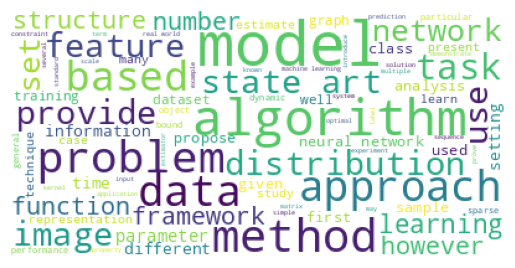

In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
#% matplotlib inline
wordcloud = WordCloud(background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50,
                          random_state=42
                         ).generate(str(corpus))
#print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
#fig.savefig("word1.png", dpi=900)

In [ ]:
stop_words = list(stop_words)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [ ]:
list(cv.vocabulary_.keys())[:10]

['non',
 'negative',
 'matrix',
 'factorization',
 'nmf',
 'useful',
 'decomposition',
 'multivariate',
 'data',
 'different']

  (0, 317)	5
  (0, 411)	1
  (0, 426)	1
  (0, 819)	1
  (0, 1655)	1
  (0, 2256)	1
  (0, 2260)	3
  (0, 2571)	1
  (0, 2668)	1
  (0, 2828)	1
  (0, 2917)	1
  (0, 2950)	1
  (0, 2952)	1
  (0, 3151)	1
  (0, 3634)	1
  (0, 3723)	1
  (0, 3880)	1
  (0, 4010)	2
  (0, 4018)	1
  (0, 4403)	1
  (0, 4510)	1
  (0, 4669)	1
  (0, 5658)	1
  (0, 6010)	1
  (0, 6153)	1
  :	:
  (3923, 7822)	1
  (3923, 7905)	1
  (3923, 7927)	2
  (3923, 8674)	1
  (3923, 8697)	1
  (3923, 9097)	1
  (3923, 9116)	1
  (3923, 9189)	1
  (3923, 9728)	1
  (3923, 9820)	1
  (3923, 10034)	1
  (3923, 10211)	1
  (3923, 10588)	1
  (3923, 10603)	2
  (3923, 10613)	1
  (3923, 10694)	2
  (3923, 10811)	2
  (3923, 11071)	2
  (3923, 11188)	1
  (3923, 11512)	2
  (3923, 11675)	1
  (3923, 12003)	1
  (3923, 12004)	1
  (3923, 12143)	1
  (3923, 12354)	1
[[1 1 5 ... 1 1 1]]
dict_items([('non', 7400), ('negative', 7268), ('matrix', 6610), ('factorization', 4018), ('nmf', 7379), ('useful', 12005), ('decomposition', 2668), ('multivariate', 7161), ('data', 2571),

[Text(0, 0, 'model'),
 Text(0, 0, 'algorithm'),
 Text(0, 0, 'learning'),
 Text(0, 0, 'method'),
 Text(0, 0, 'problem'),
 Text(0, 0, 'data'),
 Text(0, 0, 'approach'),
 Text(0, 0, 'function'),
 Text(0, 0, 'based'),
 Text(0, 0, 'network'),
 Text(0, 0, 'time'),
 Text(0, 0, 'paper'),
 Text(0, 0, 'result'),
 Text(0, 0, 'task'),
 Text(0, 0, 'distribution'),
 Text(0, 0, 'propose'),
 Text(0, 0, 'state'),
 Text(0, 0, 'feature'),
 Text(0, 0, 'image'),
 Text(0, 0, 'performance')]

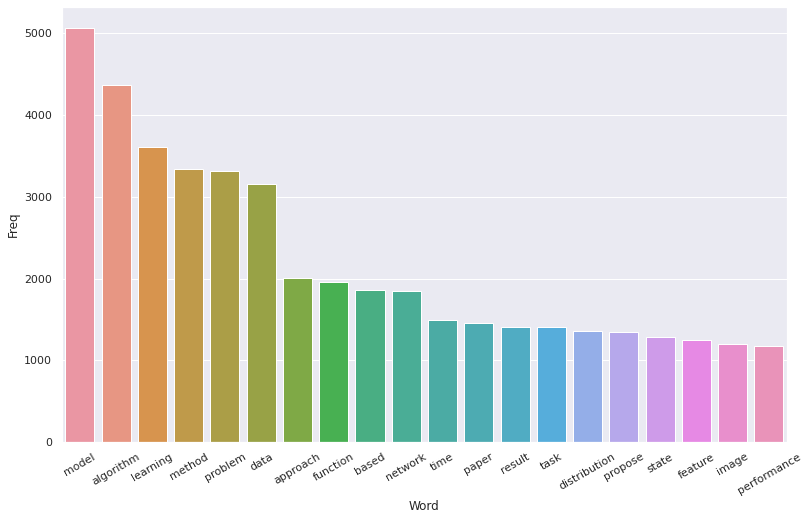

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    print(bag_of_words)
    sum_words = bag_of_words.sum(axis=0)
    print(sum_words)
    print(vec.vocabulary_.items())
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                   vec.vocabulary_.items()]
    print(words_freq)
    words_freq =sorted(words_freq, key = lambda x: x[1],
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                   Bi-gram  Freq
0                state art   718
1           neural network   561
2         machine learning   413
3               real world   376
4       learning algorithm   350
5         high dimensional   326
6              lower bound   259
7                 data set   239
8            paper propose   237
9     optimization problem   225
10         graphical model   224
11     experimental result   220
12           loss function   208
13  reinforcement learning   205
14                low rank   202
15        gradient descent   188
16        gaussian process   184
17        learning problem   180
18        convergence rate   178
19     stochastic gradient   175


[Text(0, 0, 'state art'),
 Text(0, 0, 'neural network'),
 Text(0, 0, 'machine learning'),
 Text(0, 0, 'real world'),
 Text(0, 0, 'learning algorithm'),
 Text(0, 0, 'high dimensional'),
 Text(0, 0, 'lower bound'),
 Text(0, 0, 'data set'),
 Text(0, 0, 'paper propose'),
 Text(0, 0, 'optimization problem'),
 Text(0, 0, 'graphical model'),
 Text(0, 0, 'experimental result'),
 Text(0, 0, 'loss function'),
 Text(0, 0, 'reinforcement learning'),
 Text(0, 0, 'low rank'),
 Text(0, 0, 'gradient descent'),
 Text(0, 0, 'gaussian process'),
 Text(0, 0, 'learning problem'),
 Text(0, 0, 'convergence rate'),
 Text(0, 0, 'stochastic gradient')]

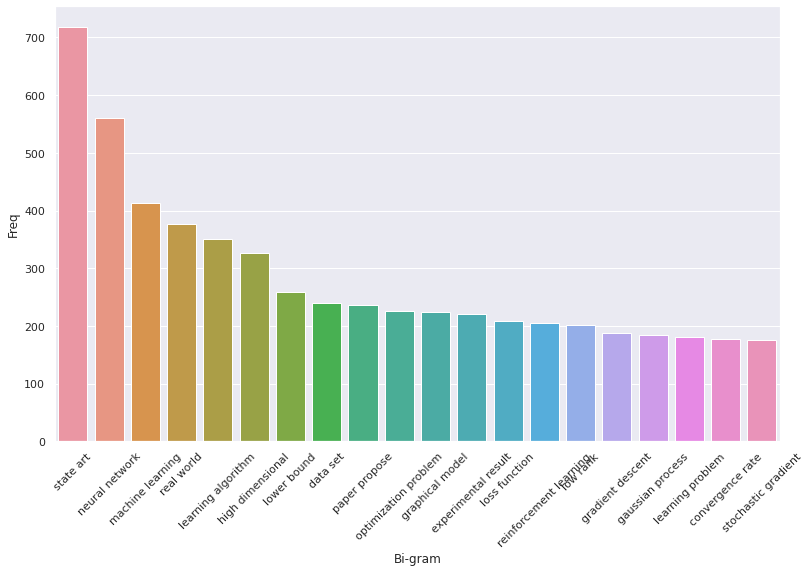

In [ ]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                        Tri-gram  Freq
0   convolutional neural network   100
1            deep neural network    96
2    stochastic gradient descent    84
3          state art performance    82
4            real world datasets    76
5       recurrent neural network    73
6               state art method    73
7                real world data    68
8        markov decision process    63
9                low rank matrix    63
10          synthetic real world    62
11      semi supervised learning    61
12            multi armed bandit    61
13         outperforms state art    60
14              state art result    60
15         latent variable model    57
16            markov chain monte    55
17             chain monte carlo    55
18  principal component analysis    50
19   empirical risk minimization    50


[Text(0, 0, 'convolutional neural network'),
 Text(0, 0, 'deep neural network'),
 Text(0, 0, 'stochastic gradient descent'),
 Text(0, 0, 'state art performance'),
 Text(0, 0, 'real world datasets'),
 Text(0, 0, 'recurrent neural network'),
 Text(0, 0, 'state art method'),
 Text(0, 0, 'real world data'),
 Text(0, 0, 'markov decision process'),
 Text(0, 0, 'low rank matrix'),
 Text(0, 0, 'synthetic real world'),
 Text(0, 0, 'semi supervised learning'),
 Text(0, 0, 'multi armed bandit'),
 Text(0, 0, 'outperforms state art'),
 Text(0, 0, 'state art result'),
 Text(0, 0, 'latent variable model'),
 Text(0, 0, 'markov chain monte'),
 Text(0, 0, 'chain monte carlo'),
 Text(0, 0, 'principal component analysis'),
 Text(0, 0, 'empirical risk minimization')]

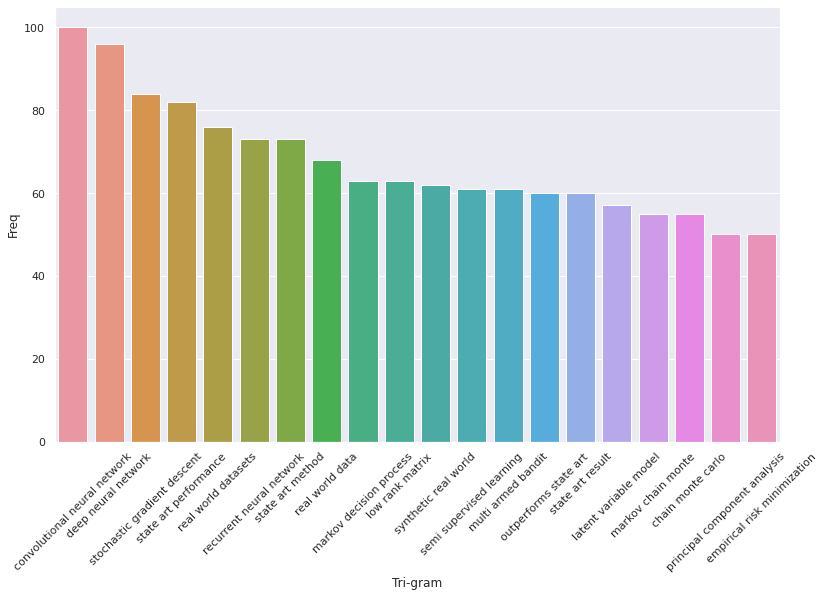

In [ ]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
#print(X)
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# # get feature names
feature_names=cv.get_feature_names_out()
print(feature_names)
# fetch document for which keywords needs to be extracted
print(corpus[532])
doc=corpus[532]
print(doc)
#generate tf-idf for the given document
print(cv.transform([doc]))
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))
print(tf_idf_vector)

['ability' 'ability model' 'able' ... 'zero sum' 'zero sum game' 'zeta']
present theory compositionality stochastic optimal control showing task optimal controller constructed certain primitive primitive feedback controller pursuing agenda mixed proportion much progress making towards agenda compatible agenda present task resulting composite control law provably optimal problem belongs certain class class rather general yet number unique property bellman equation made linear even non linear discrete dynamic give rise compositionality developed special case linear dynamic gaussian noise framework yield analytical solution e non linear mixture linear quadratic regulator without requiring final cost quadratic generally natural set control primitive constructed applying svd green function bellman equation illustrate theory context human arm movement idea optimality compositionality prominent field motor control yet hard reconcile work make possible
present theory compositionality stochasti

In [ ]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    print(coo_matrix.col)
    print(coo_matrix.data)
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""

    #use only topn items from vector
    sorted_items = sorted_items[:topn]
    #print(sorted_items)

    score_vals = []
    feature_vals = []

    # word index and corresponding tf-idf score
    for idx, score in sorted_items:

        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]

    return results
#sort the tf-idf vectors by descending order of scores
#print(tf_idf_vector.tocoo())
sorted_items=sort_coo(tf_idf_vector.tocoo())
print('tf:',tf_idf_vector.tocoo())
print(sorted_items)
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,10)
print(keywords)

# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


[9988 9986 9952 9945 9935 9928 9576 9369 9280 9161 9088 8851 8656 8655
 8543 8389 8289 7996 7937 7881 7565 7468 7384 7320 7316 7298 7286 7109
 7051 6985 6896 6363 6346 6339 6179 6089 6075 6059 5916 5814 5801 5795
 5794 5543 5536 5106 5101 5096 5069 4876 4854 4844 4636 4081 4056 4014
 3850 3679 3675 3633 3601 3580 3571 3486 3446 3285 3273 3266 2955 2952
 2882 2668 2503 2371 1925 1825 1819 1778 1762 1573 1570 1512 1322 1255
 1254 1214 1209  944  939  659  552  488]
[0.06104682 0.13370911 0.11045888 0.04217095 0.10300599 0.05407367
 0.0853738  0.07454742 0.11451467 0.08034907 0.09493008 0.04911887
 0.07008512 0.06486088 0.05135634 0.06619657 0.03946221 0.08824763
 0.05818422 0.0836074  0.06536095 0.14368281 0.0721547  0.09424771
 0.0484626  0.09493008 0.08500389 0.0267486  0.29154165 0.07709859
 0.0561026  0.07902532 0.1042347  0.13332098 0.03959447 0.1534598
 0.08548504 0.05672693 0.05407367 0.05672693 0.08966563 0.11250869
 0.0887059  0.06336206 0.08232744 0.06191521 0.09359439 0.052721